<a href="https://colab.research.google.com/github/PaulaDiz/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PRACTICA3_GRUPO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRUPO B2
Rubén Sierra Serrano, Paula Diz Diz y Lucía de Angulo Pelayo.

ENUNCIADO PRÁCTICA 3: Crea un modelo de Red de Neuronas Convolucionales que sea capaz de reconocer y clasificar imágenes en 100 categorías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

Primero importamos las librerías necesarias para ejecutar nuestro modelo:

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

##CARGA DE LOS DATOS
Descargamos el dataset y cargamos los datos de entrenamiento y de test.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode = 'coarse')

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Comprobación de los tamaños de los datos de entrenamiento y test: y = etiquetas; x = imagenes . Como podemos observar se van a usar 50 mil imágenes para training, que son las imágenes con las que se entrenará nuestro modelo, y 10 mil imágenes de test.  Después de haber entrenado el modelo con las imágenes de training, crearemos una red de neuronas capaz de recononcer imágenes que nunca había visto antes, es decir, nuestras imagenes de test.

In [3]:
print("Forma de x_train:", len(x_train), " Forma de y_train:",len(y_train))
print("Forma de x_test:", len(x_test), " Forma de y_test:", len(y_test))

Forma de x_train: 50000  Forma de y_train: 50000
Forma de x_test: 10000  Forma de y_test: 10000


Vamos a visualizar alguna imagen del set de entrenamiento.

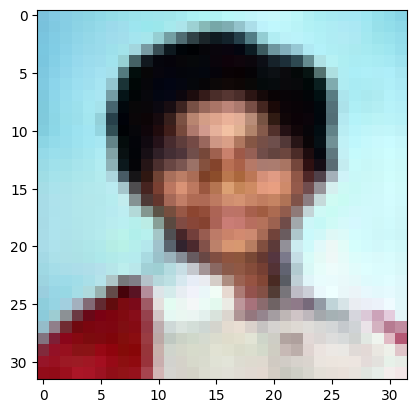

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3])


Como vemos, las imágenes de CIFAR-100 tienen baja calidad, por lo que la complicación de trabajar con ellas es mayor a otras bases de datos que contienen imágenes nítidas.

##LIMPIEZA Y MEJORA DE LA BASE DE DATOS

La calidad de la base de datos tiene un impacto directo en la calidad del modelo. Una base de datos de alta calidad ofrecerá datos de entrenamiento precisos y representativos, lo que resulta en un modelo más generalizable y correcto. Los datos de entrenamiento deben representar de manera adecuada la variabilidad y la diversidad de todos los datos para que el modelo pueda aprender patrones útiles. Limpiar la base de datos nos ayudará a construir modelos que pueden manejar datos con ruido, outliers y variaciones en la entrada. La diversidad en los datos permite que el modelo se adapte a diferentes escenarios y condiciones.

Buscamos y eliminamos las imágenes duplicadas:

In [4]:
import numpy as np
#convertimos imágenes para que sean unidimensionales
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

#comprobar si hay imágenes duplicadas en el set de entrenamiento
duplicates_train = len(x_train_flat) - len(np.unique(x_train_flat, axis=0))
if duplicates_train > 0:
    print(f"Hay {duplicates_train} imágenes duplicadas en el conjunto de entrenamiento.")
else:
    print("No hay imágenes duplicadas en el conjunto de entrenamiento.")

#ahora comprobamos en el set de test
duplicates_test = len(x_test_flat) - len(np.unique(x_test_flat, axis=0))
if duplicates_test > 0:
    print(f"Hay {duplicates_test} imágenes duplicadas en el conjunto de test.")
else:
    print("No hay imágenes duplicadas en el conjunto de test.")

#ahora buscamos los índices de las imágenes replicadas. primero las de train
unique_indices_train = np.unique(x_train_flat, axis=0, return_index=True)[1]
duplicated_indices_train = np.setdiff1d(np.arange(x_train.shape[0]), unique_indices_train)

#lo mismo pero en las de test
unique_indices_test = np.unique(x_test_flat, axis=0, return_index=True)[1]
duplicated_indices_test = np.setdiff1d(np.arange(x_test.shape[0]), unique_indices_test)

#Ahora eliminamos las imágenes duplicadas
x_train_filtered = np.delete(x_train, duplicated_indices_train, axis=0)
y_train_filtered = np.delete(y_train, duplicated_indices_train, axis=0)
duplicates_after_removal = len(x_train) - len(x_train_filtered)
if duplicates_after_removal > 0:
    print(f"Se han eliminado {duplicates_after_removal} imágenes duplicadas del conjunto de entrenamiento.")
else:
    print("No hay imágenes duplicadas en el conjunto de entrenamiento.")

x_test_filtered = np.delete(x_test, duplicated_indices_test, axis=0)
y_test_filtered = np.delete(y_test, duplicated_indices_test, axis=0)

#comprobar cuántas imágenes se han eliminado
duplicates_after_removal = len(x_test) - len(x_test_filtered)
if duplicates_after_removal > 0:
    print(f"Se eliminaron {duplicates_after_removal} imágenes duplicadas del conjunto de test.")
else:
    print("No hay imágenes duplicadas en el conjunto de test.")

Verificamos si hay etiquetas 'NaN':

In [5]:
import numpy as np

# Verificar si hay NaN en las etiquetas de entrenamiento
nan_train_labels = np.isnan(y_train).any()

# Verificar si hay NaN en las etiquetas de test
nan_test_labels = np.isnan(y_test).any()

if nan_train_labels:
    print("Se han encontrado valores NaN en las etiquetas de entrenamiento.")
else:
    print("No se han encontrado valores NaN en las etiquetas de entrenamiento.")

if nan_test_labels:
    print("Se han encontrado valores NaN en las etiquetas de test.")
else:
    print("No se han encontrado valores NaN en las etiquetas de test.")

No se han encontrado valores NaN en las etiquetas de entrenamiento.
No se han encontrado valores NaN en las etiquetas de test.


##CONSTRUIMOS LA RED

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       73984     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         295040    
                                                                 
 dropout (Dropout)           (None, 4, 4, 128)         0

Este resumen nos ofrece información sobre la arquitectura y los parámetros de la CNN.  
Se trata de un modelo secuencial, es decir, las capas van una tras otra.  La arquitectura de la red consta de 9 capas: las tres capas convolucionales (Conv2D) tienen 32, 256, 128 neuronas respectivamente y filtros de tamaño (3,3).  Hay dos capas MaxPooling2D que se emplean para reducir la resolución espacial de las representaciones de características.  Ayudan a disminuir el número de parámetros y los cálculos que realiza la red.

En cuanto a los parámetros, en total la red tiene 507556 entrenables.

Tras probar diversas combinaciones de hiperparámetros y estructuras de la red, hemos llegado a esta, la cual nos ha dado el mejor resultado (55% de precisión).  Parece ser eficiente el poner dos capas convencionales al final de la estructura (capas Dense).  El input shape es (32, 32, 3) porque las imágenes son de 32x32 y son a color.  La capa final contiene 100 neuronas porque hay 100 cateogorías en las cuales son clasificadas las imágenes y la función de activación empleada en dicha capa es 'softmax', la cual es ampliamente utilizada en problemas de clasificación multiclase al dar salida a valores entre 0 y 1 (probabilidades de pertenencia a cierta clase).  

Vamos a normalizar los datos para que los valores de las matrices de las imágenes se encuentren en el rango [0, 1].  Las etiquetas las pasamos a one-hot encoding.

Compilamos el programa.
El optimizador 'adam' resulta muy eficiente para los modelos de redes neuronales convolucionales.  Empleamos 'categorical_crossentropy' para calcular la pérdida porque nuestras etiquetas están en formato one-hot.

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Entrenamiento del modelo.

Ahora elegimos el 20% de los datos de entrenamiento para que sean de validación y así poder ir comprobando que nuestro modelo entrena correctamente.  Acto seguido entrenamos el modelo.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

history = model.fit(x_train, y_train, epochs=30,batch_size=64, validation_data=(x_val,y_val))

Epoch 1/30


ValueError: ignored

Comprobamos la validez de nuestro modelo observando la precisión que este presenta con los datos de test, que son datos que nunca ha visto.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nAccuracy en el conjunto de prueba: {test_acc}')

# APORTACIONES E INVESTIGACIÓN EXTRA
### EfficientNet
En este proyecto experimentamos con diversas arquitecturas de redes neuronales, como la familia de las EfficientNet, ResNet, DenseNet y VGG16. Estas arquitecturas, debido a su complejidad interna, el agotamiento de los recursos disponibles en Google Colab y el tiempode ejecución, limitaron nuestras pruebas. Perp observamos que las redes ResNet resultaron ser altamente efectivas.

## Optimizador SAM
También hemos encontrado que SAM es un enfoque de optimización para entrenar modelos de aprendizaje profundo. La idea principal detrás de SAM es mejorar la generalización del modelo minimizando la sensibilidad del modelo a pequeñas perturbaciones en los datos de entrada. En lugar de simplemente minimizar la pérdida en los datos de entrenamiento, SAM también considera la "sharpness" de la función de pérdida. La nitidez se refiere a cuán abruptamente cambia la pérdida en las cercanías del punto actual en el espacio de parámetros del modelo. SAM introduce un término de regularización que penaliza los cambios bruscos en los parámetros del modelo, lo que ayuda a suavizar la función de pérdida y mejorar la generalización.

## Co-Learning
También hemos explorado un método conocido como Co-Learning, en el cual dos o más redes neuronales aprenden de manera colaborativa. En nuestro, nos hemos enfrentado a la limitación de Colab, ya que requiere la ejecución simultánea de varias redes neuronales.

## Fractional maxpooling
Además probamos con CNNs que emplean fractional maxpooling, que ayuda a reducir el tamaño de la información y proporciona cierta invariancia a cambios en la posición y forma de las imágenes al aplicar pooling, lo que permite ajustar la cantidad de reducción de datos de manera más flexible. Esta mejora resulta en un rendimiento mejorado en la tarea de reconocimiento de patrones en conjuntos de datos específicos.

## Transfer learning
Otro factor interesante que hemos estudiado es el transfer learning, o 'aprendizaje por transferencia'. Es un enfoque en el aprendizaje automático en el cual se utiliza el conocimiento adquirido al resolver una tarea para mejorar el rendimiento en otra tarea relacionada. En lugar de entrenar un modelo desde cero para cada tarea específica, se aprovechan los conocimientos previos aprendidos en una tarea para ayudar en el aprendizaje de otra tarea.

## Transformaciones de imágenes para la mejora de la base de datos.
Al neceesitar unos buenos datos hemos intentado realizar distintas transformaciones a los datos, para que estos sean mejores y faciliten el entrenamiento, debido a la capacidad de RAM esto no ha sido posible, ya que ocupaba gran cantidad de RAM.

### Aumento de imágenes
Aumentar la resolución de las imágenes proporciona más detalles y contexto a la red neuronal durante el entrenamiento. Esto puede ayudar a mejorar la capacidad de la red para generalizar patrones y características a diferentes escalas.

CODIGO "lo implantamos comentado por si pudiera ocasionar algún error en la compilación del programa"






In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#from scipy.ndimage import zoom


#import numpy as np

#función para aplicar el aumento a todas las imágenes de la base de datos

#from scipy.ndimage import zoom
#def aumentar_imagen(imagen, factor_aumento=2):
    #imagen_aumentada = zoom(imagen, (factor_aumento, factor_aumento, 1), order=2)
    #return imagen_aumentada

#Uso de la función para el aumento

#imagen_aumentada_train = list(map(lambda imagen: aumentar_imagen(imagen, 2), x_train))
#imagen_aumentada_test = list(map(lambda imagen: aumentar_imagen(imagen, 2), x_test))

# Visualizamos y comparamos algunas imágenes
#for i in range(5):
  #plt.figure(figsize=(10, 10))

  #plt.subplot(1, 2, 1)
  #plt.imshow(imagen_aumentada_train[i])
  #plt.title("Aumentada")
  #plt.axis("off")
  #plt.imshow(imagen_aumentada_train[i], cmap='gray')

  #plt.subplot(1, 2, 2)
  #plt.imshow(x_train[i])
  #plt.title("Original")
  #plt.axis("off")
  #plt.imshow(x_train[i], cmap='gray')

  #plt.show()

### Brillo y contraste
Al igual que el aumento de imágenes, exponer la red neuronal a imágenes con diferentes niveles de brillo y contraste, se mejora su capacidad para adaptarse a nuevas condiciones de iluminación en el mundo real.

CODIGO "lo implantamos comentado por si pudiera ocasionar algún error en la compilación del programa"

In [ ]:
#intalación de la librería para poder ejecutar el código
#pip install Pillow

In [ ]:
#from PIL import Image, ImageEnhance
#import os
#import numpy as np

#función para ajustar los brillos

#def ajustes_brillo_contraste(input_folder, output_folder, brillo_factor=1.5, contraste_factor=1.5):
    # Asegúrate de que la carpeta de salida exista
#    if not os.path.exists(output_folder):
 #       os.makedirs(output_folder)
#
    # Iterar sobre todas las imágenes en la carpeta de entrada
 #   for i, imagen_array in enumerate(x_train):
        # Convertir el array de la imagen a un objeto Image de Pillow
  #      imagen = Image.fromarray(imagen_array.astype('uint8'))  # Convertir el tipo de datos a uint8

        # Aplicar ajustes aleatorios de brillo y contraste
   #     imagen = ajustar_brillo_contraste(imagen, brillo_factor, contraste_factor)

        # Crear la ruta de salida y guardar la nueva imagen
    #    output_path = os.path.join(output_folder, f"imagen_{i}.png")
     #   imagen.save(output_path)

#función parfa ajustar las imágenes a los brillos

#def ajustar_brillo_contraste(imagen, brillo_factor, contraste_factor):
 #   enhancer = ImageEnhance.Brightness(imagen)
  #  imagen = enhancer.enhance(np.random.uniform(1, brillo_factor))

   # enhancer = ImageEnhance.Contrast(imagen)

    #imagen = enhancer.enhance(np.random.uniform(1, contraste_factor))

    #return imagen

#input_folder = "imagen_aumentada_train"
#output_folder = "imagen_aumentada_train"
#brillo_factor = 1.5
#contraste_factor = 1.5

#ajustes_brillo_contraste(input_folder, output_folder, brillo_factor, contraste_factor)

#mostramos las imágenes para ver la diferencia

#plt.figure(figsize=(20, 20))
#for i in range(5):
    # Ploteamos sin máscara
    #plt.subplot(2, 5, 1 + i)
    #plt.axis('off')
    #plt.imshow(imagen_aumentada_train[i], cmap='gray')

#plt.show()

### Máscara Sharpen
Puede resaltar detalles finos y mejorar la definición de los objetos en las imágenes.

CODIGO "lo implantamos comentado por si pudiera ocasionar algún error en la compilación del programa"

In [ ]:
#import numpy as np
#import cv2

#función para aplicar la máscara

#def sharpen(dataset):
    #kernel = (-1 / 256.0) * np.array(
        #np.asarray([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, -476, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]))

    #for i in range(len(dataset)):
        #dataset[i] = cv2.filter2D(np.array(dataset[i]), -1, kernel)  # Convertir la lista a un arreglo usando np.array()

    #return dataset

#x_train_filtered = sharpen(imagen_aumentada_train)

#Visualizar imágenes

#for i in range(5):
  #plt.figure(figsize=(8, 8))

  #plt.subplot(1, 2, 1)
  #plt.imshow(imagen_aumentada_train[i])
  #plt.title("sin mascara")
  #plt.axis("off")
  #plt.imshow(imagen_aumentada_train[i], cmap='gray')

  #plt.subplot(1, 2, 2)
  #plt.imshow(x_train[i])
  #plt.title("con mascara")
  #plt.axis("off")
  #plt.imshow(x_train_filtered[i], cmap='gray')

  #plt.show()